In [1]:
######
### Project -  Python Script for Data Preparation
#####

In [2]:
import pandas as pd
from pandas import DataFrame, Series

import numpy as np

import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import inspect

import matplotlib.pyplot as plt

In [3]:
### Import data from CSV

In [4]:
dirtydata=pd.read_csv('dirtydata_sales10000.csv')

In [5]:
# Visually inspect data for potential problems.
dirtydata.head(20)

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
2,60611.0,23.0,1,NaN,0,1,0,NaN,1.0,1.0,...,0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,30303.0,25.0,1,NaN,0,NaN,1,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,10.0,0
5,2108.0,55.0,1,1,1,1,10,0.0,0.0,0.0,...,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0
6,90033.0,44.0,1,1,1,1,0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1
7,NaN,49.0,1,1,1,0,1,1.0,1.0,0.0,...,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
8,33129.0,33.0,1,1,1,0,0,1.0,1.0,0.0,...,0,0.0,1.0,0.0,NaN,1.0,1.0,NaN,0.0,1
9,2109.0,37.0,0,1,1,0,1,0.0,1.0,0.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0


In [6]:
### Clean data by removing any rows with missing or invalid data.

In [7]:
# Drop the NaN values
cleandata = dirtydata.dropna()
cleandata.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
5,2108.0,55.0,1,1,1,1,10,0.0,0.0,0.0,...,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0
6,90033.0,44.0,1,1,1,1,0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1


In [8]:
# Check to see if numeric data is stored at the correct datatype
for i in cleandata[0:5]['XBOX360']:
    print type(i), i
print ('Current size of dataset: {}'.format(len(cleandata.index)))

<type 'str'> 1
<type 'str'> 0
<type 'str'> 1
<type 'str'> 1
<type 'str'> 1
Current size of dataset: 9432


In [9]:
for i in cleandata[0:5]['DellLaptop']:
    print type(i), i
print ('Current size of dataset: {}'.format(len(cleandata.index)))

<type 'str'> 0
<type 'str'> 0
<type 'str'> 1
<type 'str'> 1
<type 'str'> 1
Current size of dataset: 9432


In [10]:
# Convert everything to a number and see if it worked
cleandata = cleandata.apply(pd.to_numeric, errors='coerce')
for i in cleandata[0:5]['XBOX360']:
    print type(i), i
print ('Current size of dataset: {}'.format(len(cleandata.index)))

<type 'numpy.float64'> 1.0
<type 'numpy.float64'> 0.0
<type 'numpy.float64'> 1.0
<type 'numpy.float64'> 1.0
<type 'numpy.float64'> 1.0
Current size of dataset: 9432


In [11]:
# Create an array of index values for invalid data in the remaining dataset.
# Data to identify include ZipCodes that are too long/too short,
# ages outside of believable parameters, and sales tallies other than 0 or 1.

seq = []

for i in cleandata.itertuples():
    a = len(str(int(i[1])))
    if a > 5 or a < 4:
        seq.append(i[0])
        continue
    if i[2] < 18 or i[2] > 150:
        seq.append(i[0])
        continue
    for k in i[3:]:
        if k != 1 and k != 0 :
            seq.append(i[0])
            continue
print(seq)

[5, 15, 25, 31, 32, 81, 84, 130, 164, 178, 264, 266, 288, 296, 297, 304, 312, 352, 374, 381, 395, 445, 480, 486, 508, 528, 547, 571, 587, 590, 620, 620, 645, 684, 686, 687, 697, 698, 754, 974, 975, 981, 1254, 1264, 1280, 1281, 1330, 1333, 1379, 1413, 1427, 1513, 1515, 1537, 1545, 1546, 1553, 1561, 1601, 1630, 1631, 1644, 1660, 1693, 1694, 1729, 1735, 1757, 1777, 1796, 1820, 1836, 1839, 1869, 1869, 1894, 1933, 1935, 1946, 1947, 2003, 2223, 2224, 2230, 2503, 2513, 2523, 2529, 2530, 2579, 2582, 2628, 2659, 2662, 2676, 2762, 2764, 2786, 2794, 2795, 2802, 2810, 2850, 2879, 2880, 2893, 2909, 2942, 2943, 2978, 2984, 3006, 3026, 3045, 3069, 3085, 3088, 3118, 3118, 3143, 3182, 3184, 3195, 3196, 3252, 3472, 3473, 3479, 3752, 3762, 3772, 3778, 3779, 3828, 3831, 3877, 3911, 3925, 4011, 4013, 4035, 4043, 4044, 4051, 4059, 4099, 4128, 4129, 4142, 4158, 4191, 4192, 4227, 4233, 4255, 4275, 4294, 4318, 4334, 4337, 4367, 4367, 4392, 4431, 4433, 4444, 4445, 4501, 4721, 4722, 4728, 5011, 5021, 5027, 5028,

In [12]:
# Drop all rows which contain invalid data
cleandata = cleandata.drop(seq)
cleandata.head(15)

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
3,60616.0,56.0,0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
6,90033.0,44.0,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1
9,2109.0,37.0,0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0
10,2109.0,57.0,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
13,62791.0,27.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1
16,60616.0,43.0,0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
17,2110.0,28.0,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1
18,60616.0,54.0,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1


In [13]:
print ('Current size of dataset: {}'.format(len(cleandata.index)))

Current size of dataset: 9092


In [14]:
### Save cleaned data to an SQL database.

In [15]:
engine=create_engine('sqlite:///salesData.db')

In [16]:
# Since this is a mock database, each time this script runs it will replace existing data.
cleandata.to_sql('productPurchases', engine, if_exists='replace')

In [17]:
# Check to see if table was created in the database.
insp=inspect(engine)
insp.get_table_names()

[u'productPurchases']

In [18]:
pd.read_sql_table('productPurchases', engine).columns

Index([u'index', u'ZipCode', u'CustomerAge', u'SamsungTV46LED', u'SonyTV42LED',
       u'XBOX360', u'DellLaptop', u'BoseSoundSystem', u'BoseHeadSet',
       u'SonyHeadSet', u'iPod', u'iPhone', u'Panasonic50LED', u'SonyPS4',
       u'WiiU', u'WDexternalHD', u'SamsungTV55LED', u'SonyTV60LED',
       u'SandiskMemoryCard', u'SonySoundSystem', u'SonyCamera',
       u'PanasonicCamera', u'HPPrinter', u'SonyDVDplayer', u'ToshibaDVDplayer',
       u'GalaxyTablet', u'SurfaceTablet', u'HPLaptop', u'HDMICable',
       u'SpeakerCable', u'CallOfDutyGame', u'GrandTheftAutoGame',
       u'ASUSLaptop', u'LenevoLaptop', u'TVStandWallMount'],
      dtype='object')

In [19]:
### Query Database Set 1

In [20]:
# Query example #1: get the transactions for the customers in zipCode 60616

In [21]:
resultsForBestDealCustTrans=pd.read_sql_query("SELECT * FROM productPurchases WHERE ZipCode='60616'", engine)

In [22]:
resultsForBestDealCustTrans[0:1]

,index,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,3,60616.0,56.0,0,1.0,1.0,1.0,0.0,0.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [23]:
# Query example #2: get the transactions for ALL customers

In [24]:
resultsForBestDealCustTrans=pd.read_sql_query("SELECT * FROM productPurchases", engine)

In [25]:
len(resultsForBestDealCustTrans)

9092

In [26]:
resultsForBestDealCustTrans.head()

,index,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,0,30134.0,35.0,1,1.0,1.0,0.0,0.0,1.0,1.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,1,62791.0,43.0,0,1.0,0.0,0.0,1.0,0.0,1.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
2,3,60616.0,56.0,0,1.0,1.0,1.0,0.0,0.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,6,90033.0,44.0,1,1.0,1.0,1.0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1
4,9,2109.0,37.0,0,1.0,1.0,0.0,1.0,0.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0


In [27]:
# Query example #3: get the number of customers in every ZipCode sorted by ZipCode

In [28]:
resultsForBestDealCustTrans=pd.read_sql_query("SELECT ZipCode , COUNT(*) as 'num_customers' FROM productPurchases GROUP BY ZipCode  ORDER BY ZipCode", engine)

In [29]:
resultsForBestDealCustTrans

,ZipCode,num_customers
0,2108.0,613
1,2109.0,917
2,2110.0,224
3,10065.0,750
4,30134.0,1133
5,30303.0,985
6,33129.0,531
7,33130.0,280
8,44114.0,510
9,60532.0,243


In [30]:
# Query example #4: get the number of customers for  every Age Group in ZipCode 60616 sorted by CustomerAge

In [31]:
resultsForBestDealCustTrans=pd.read_sql_query(
"SELECT CustomerAge , COUNT(*) as 'num_customers' FROM productPurchases WHERE ZipCode=60616 GROUP BY CustomerAge  ORDER BY CustomerAge", engine)

In [32]:
resultsForBestDealCustTrans

,CustomerAge,num_customers
0,21.0,56
1,22.0,32
2,23.0,40
3,25.0,88
4,26.0,48
5,27.0,32
6,28.0,32
7,29.0,56
8,31.0,16
9,32.0,16


In [33]:
# Query example #5: Plot in a stacked-bar figure the number of 
# customers who bought SonyTV60LED and/or BoseSoundSystem in 
# every zipcode that has more than 400 customers who bought these
# two products(either bought one of these products or the two products)

In [34]:
SonyTV60LEDCustTrans=pd.read_sql_query(
"SELECT ZipCode , COUNT(*) as 'num_customers' FROM productPurchases WHERE SonyTV60LED=1  GROUP BY ZipCode HAVING COUNT(*) > 400", engine)

BoseSoundSystemCustTrans=pd.read_sql_query(
"SELECT ZipCode , COUNT(*) as 'num_customers' FROM productPurchases WHERE BoseSoundSystem=1 GROUP BY ZipCode HAVING COUNT(*) > 400", engine)

In [35]:
SonyTV60LEDCustTrans

,ZipCode,num_customers
0,2108.0,402
1,2109.0,578
2,10065.0,439
3,30134.0,757
4,30303.0,517
5,60616.0,689


In [36]:
BoseSoundSystemCustTrans

,ZipCode,num_customers
0,2109.0,424
1,30134.0,799
2,30303.0,464
3,60616.0,466
4,90033.0,404


In [37]:
SonyTV60LEDCustTrans.ZipCode

0     2108.0
1     2109.0
2    10065.0
3    30134.0
4    30303.0
5    60616.0
Name: ZipCode, dtype: float64

In [38]:
### Produce a stacked bar plot of purchases for two product, broken down by ZipCode

In [39]:
# Create matching tuples for plotting

sonyZipCodeTuples=tuple(SonyTV60LEDCustTrans.ZipCode.astype(np.int))
sony_num_customersTuples=tuple(SonyTV60LEDCustTrans.num_customers.astype(np.int))

boseZipCodeTuples=tuple(BoseSoundSystemCustTrans.ZipCode.astype(np.int))
bose_num_customersTuples=tuple(BoseSoundSystemCustTrans.num_customers.astype(np.int))



sony_dict = dict(zip(sonyZipCodeTuples, sony_num_customersTuples))
bose_dict = dict(zip(boseZipCodeTuples, bose_num_customersTuples))



for key in bose_dict.keys():
    if ((key in sony_dict.keys()) == False): sony_dict[key]=0
        
for key in sony_dict.keys():
    if ((key in bose_dict.keys()) == False): bose_dict[key]=0


        
bose_zip=bose_dict.keys()
bose_zip.sort()


sony_zip=sony_dict.keys()
sony_zip.sort()


bose_zip_tuple=tuple(bose_zip)
sony_zip_tuple=tuple(sony_zip)


bose_customer_list=[]

for bose in bose_zip_tuple:
    bose_customer_list.append(bose_dict[bose])


sony_customer_list=[]

for sony in sony_zip_tuple:
    sony_customer_list.append(sony_dict[sony])


bose_customer_tuple=tuple(bose_customer_list)
sony_customer_tuple=tuple(sony_customer_list)

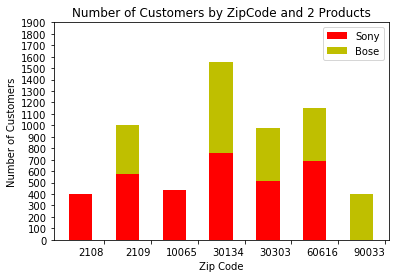

In [40]:
# Plot and display bar chart.

%matplotlib inline

ind = np.arange(len(sony_customer_tuple))    

width = .5

p1 = plt.bar(ind, sony_customer_tuple, width,  color='r')
p2 = plt.bar(ind, bose_customer_tuple, width, color='y', bottom=sony_customer_tuple)

plt.ylabel('Number of Customers')
plt.xlabel('Zip Code')
plt.title('Number of Customers by ZipCode and 2 Products')
plt.xticks(ind + width, sony_zip_tuple, horizontalalignment='right')
plt.yticks(np.arange(0, 2000, 100))
plt.legend((p1[0], p2[0]), ('Sony', 'Bose'))

plt.show()

In [41]:
### Query Database Set 2

In [42]:
# Query example #1: Get the number of customers who bought DellLaptop and HPPrinter
# for every Age group sorted by CustomerAge

In [43]:
DLandHPPbyAge = pd.read_sql_query("SELECT CustomerAge , COUNT(*) as 'num_customers'FROM productPurchases WHERE DellLaptop=1 AND HPPRINTER=1 GROUP BY CustomerAge  ORDER BY CustomerAge", engine)
DLandHPPbyAge

,CustomerAge,num_customers
0,21.0,201
1,22.0,203
2,23.0,304
3,25.0,64
4,26.0,183
5,27.0,272
6,28.0,56
7,29.0,143
8,31.0,194
9,32.0,184


In [44]:
# Query example #2: Get the list of ZipCodes where no customer bought XBOX360.

In [45]:
byZipCodeNOxbox = pd.read_sql_query("SELECT ZipCode, SUM(XBOX360) as 'XBOX Purchases' FROM productPurchases GROUP BY ZipCode HAVING SUM(XBOX360)=0", engine)
byZipCodeNOxbox

,ZipCode,XBOX Purchases
0,62791.0,0.0


### Deliverable #3 (Use SQL/SQlite/Matplotlib): Plot in a stacked-bar figure the number of customers who bought HPLaptop and/or HPPrinter but did NOT buy  WDexternalHD for  every CustomerAge group that has more than 100 customers who bought these two products(either bought one of these products or the two products but didn't buy WDexternalHD)

In [46]:
# Query example #2: Plot in a stacked-bar figure the number of customers
# who bought HPLaptop and/or HPPrinter but did NOT buy WDexternalHD for
# every CustomerAge group that has more than 100 customers who bought these
# two products(either bought one of these products or the two products but
# didn't buy WDexternalHD)

In [47]:
# AorB = HP Laptop OR Printer
AorB = pd.read_sql_query(
    "SELECT CustomerAge, COUNT(*) as 'num_customers' FROM productPurchases WHERE HPLaptop=1 OR HPPrinter=1 AND WDexternalHD=0 GROUP BY CustomerAge HAVING COUNT(*) > 100", engine)
AorB

,CustomerAge,num_customers
0,21.0,201
1,22.0,267
2,23.0,735
3,24.0,184
4,25.0,472
5,26.0,343
6,27.0,505
7,28.0,486
8,29.0,462
9,31.0,202


In [48]:
# AandB = HP Laptop AND Printer
AandB = pd.read_sql_query(
    "SELECT CustomerAge, COUNT(*) as 'num_customers' FROM productPurchases WHERE HPLaptop=1 AND HPPrinter=1 AND WDexternalHD=0 GROUP BY CustomerAge HAVING COUNT(*) > 100", engine)
AandB

,CustomerAge,num_customers
0,21.0,192
1,22.0,193
2,23.0,437
3,25.0,147
4,26.0,205
5,27.0,288
6,28.0,126
7,29.0,290
8,31.0,196
9,32.0,176


In [49]:
AorB_CustAgeTuples=tuple(AorB.CustomerAge.astype(np.int))
AorB_CustomersTuples=tuple(AorB.num_customers.astype(np.int))

AandB_CustAgeTuples=tuple(AandB.CustomerAge.astype(np.int))
AandB_CustomersTuples=tuple(AandB.num_customers.astype(np.int))




AorB_dict = dict(zip(AorB_CustAgeTuples, AorB_CustomersTuples))
AandB_dict = dict(zip(AandB_CustAgeTuples, AandB_CustomersTuples))

for key in AorB_dict.keys():
    if ((key in AandB_dict.keys()) == False): AandB_dict[key]=0

        
for key in AandB_dict.keys():
    if ((key in AorB_dict.keys()) == False): AorB_dict[key]=0


        
AorB_zip=AorB_dict.keys()
AorB_zip.sort()

AandB_zip=AandB_dict.keys()
AandB_zip.sort()

AorB_zip_tuple=tuple(AorB_zip)

AandB_zip_tuple=tuple(AandB_zip)

AorB_customer_list=[]

for i in AorB_zip_tuple:
    AorB_customer_list.append(AorB_dict[i])

AandB_customer_list=[]

for i in AandB_zip_tuple:
    AandB_customer_list.append(AandB_dict[i])

AorB_customer_tuple=tuple(AorB_customer_list)
AandB_customer_tuple=tuple(AandB_customer_list)

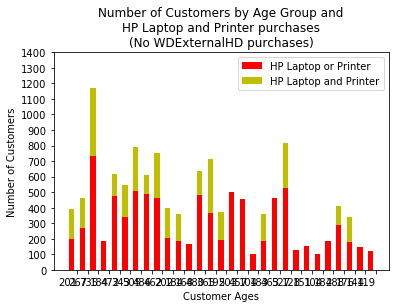

In [50]:
%matplotlib inline

ind = np.arange(len(AorB_customer_tuple))    

width = .5

p1 = plt.bar(ind, AorB_customer_tuple, width,  color='r')
p2 = plt.bar(ind, AandB_customer_tuple, width, color='y', bottom=AorB_customer_tuple)

plt.ylabel('Number of Customers')
plt.xlabel('Customer Ages')
plt.title('Number of Customers by Age Group and\nHP Laptop and Printer purchases\n(No WDExternalHD purchases)')
plt.xticks(ind + width, AorB_customer_tuple, horizontalalignment='right')
plt.yticks(np.arange(0, 1500, 100))
plt.legend((p1[0], p2[0]), ('HP Laptop or Printer', 'HP Laptop and Printer'))

plt.show()